In [ ]:
÷import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

Question 1

In [ ]:
def func(x):
  y = np.zeros(x.shape[0])
  for i in range(0,x.shape[0]):
    y[i] = np.exp(-2*x[i])*np.cos(4*np.pi*x[i])
  return y

def get_grid_points(m):
  y = np.zeros(m)
  for i in range(m):
    y[i] = i/(m-1)
  return y

In [ ]:
def get_est(m):
  w = np.zeros(m)
  train_x = get_grid_points(m)
  train_y = func(train_x)
  for i in range(1,m):
    num = train_y[i] - train_y[i-1]
    den = train_x[i] - train_x[i-1]
    w[i] = num/den

  f_hat_x = np.zeros(m)
  f_hat_x[0] = train_y[0]
  for i in range(1,m):
    f_hat_x[i] = f_hat_x[i-1] + w[i]*max(0,train_x[i]-train_x[i-1])
  return f_hat_x

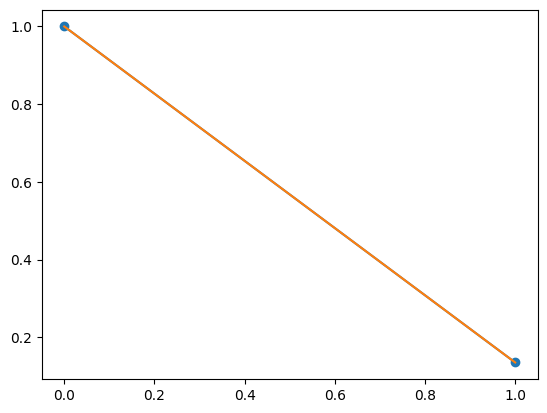

In [ ]:
train_x = get_grid_points(2)
train_y = func(train_x)
f = get_est(2)
plt.plot(train_x,train_y,marker ='o')
plt.plot(train_x,f)

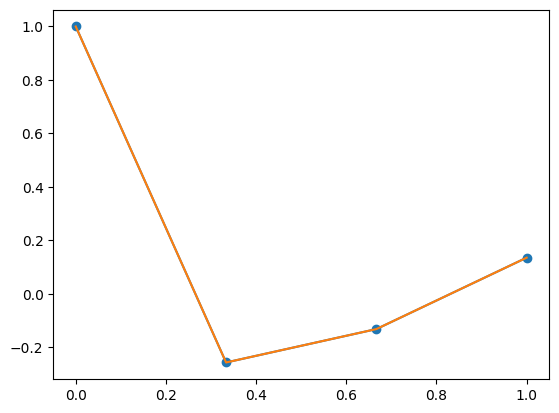

In [ ]:
train_x = get_grid_points(4)
train_y = func(train_x)
f = get_est(4)
plt.plot(train_x,train_y,marker ='o')
plt.plot(train_x,f)

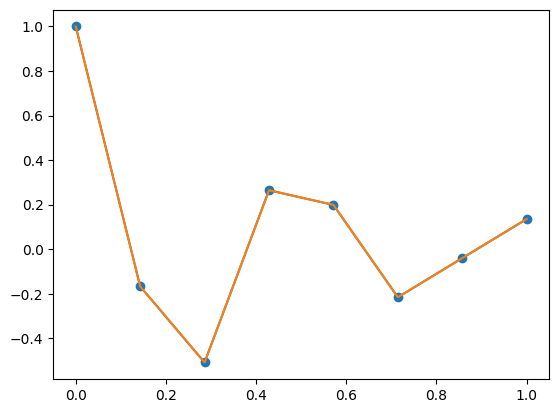

In [ ]:
train_x = get_grid_points(8)
train_y = func(train_x)
f = get_est(8)
plt.plot(train_x,train_y,marker ='o')
plt.plot(train_x,f)

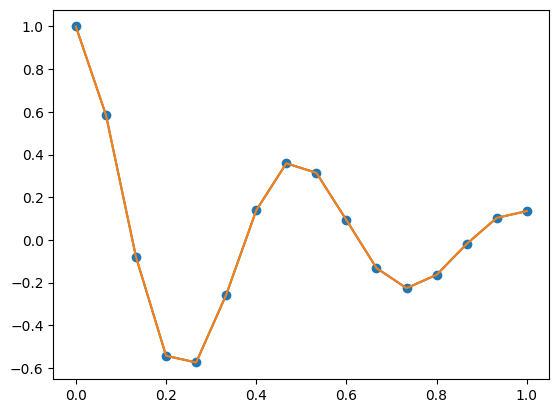

In [ ]:
train_x = get_grid_points(16)
train_y = func(train_x)
f = get_est(16)
plt.plot(train_x,train_y,marker ='o')
plt.plot(train_x,f)

In [ ]:
## this function is from Prof. Chugg's nmse_01.py notebook
## https://github.com/keithchugg/ee559_spring2023/blob/main/hw_helpers/nmse_01.py
def normalized_mse_01(f, f_hat, x_grid, G=10000):
    # f: target function
    # f_hat: values of f_hat on the grid x_grid on [0,1]
    # x_grid a "coarse" grid on [0,1].  This has M point from the approximation.
    # G: grid size for a fine grid used to approximate the integral.

    x_fine =  np.linspace(0, 1, G)                  # create the fine grid
    f_fine = f(x_fine)                              # evaluate f on the fine grid
    f_hat_fine = np.interp(x_fine, x_grid, f_hat)   # interpolate f_hat to the fine grid
    sq_error = (f_fine - f_hat_fine) ** 2           # compute squared error
    mse = np.mean(sq_error)                         # this is a scalar multiple of the integral (approximately)
    ref = np.mean(f_fine ** 2)                      # Energy in target; off by same scalar as mse
    return 10*np.log10(mse/ref)                                # scalar values cancel 

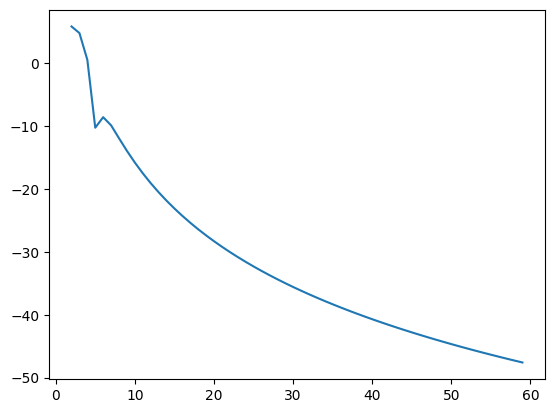

In [ ]:
M = np.asarray(range(2,60))
nmse_array = np.zeros(58)
for j,i in enumerate(M):
  train_x = get_grid_points(i)
  train_y = func(train_x)
  f = get_est(i)
  nmse_array[j]= normalized_mse_01(func,f,train_x)

plt.plot(M,nmse_array)
#-40db at M-39

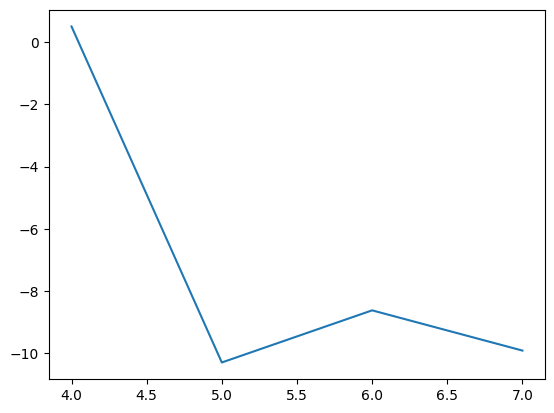

In [ ]:
M = np.asarray(range(4,8))
nmse_array = np.zeros(4)
for j,i in enumerate(M):
  train_x = get_grid_points(i)
  train_y = func(train_x)
  f = get_est(i)
  nmse_array[j]= normalized_mse_01(func,f,train_x)

plt.plot(M,nmse_array)
#-40db at M-39

Question 2

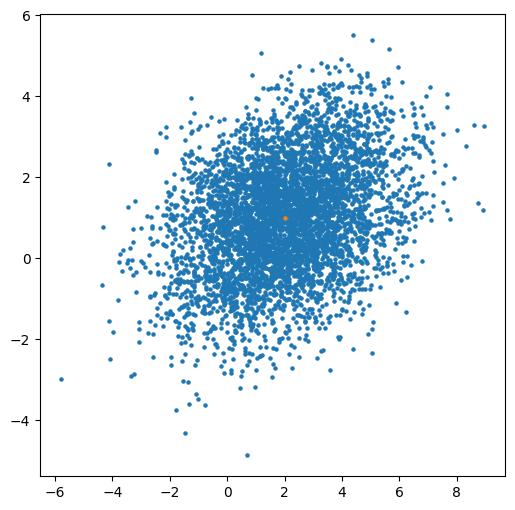

In [ ]:
mean1=np.array([2, 1])
cov1=np.array([[4, 1],[1, 2]])
p=[]

for i in range(5000):
    a=np.random.normal(0,1,size=(2))
    l=np.linalg.cholesky(cov1)
    p.append(np.dot(l,a))
    samples=np.array(mean1+p)

plt.figure(figsize=(6,6))
plt.scatter(samples[:,0],samples[:,1],marker='o',s=5)
plt.scatter(2,1,s=5)
plt.show()

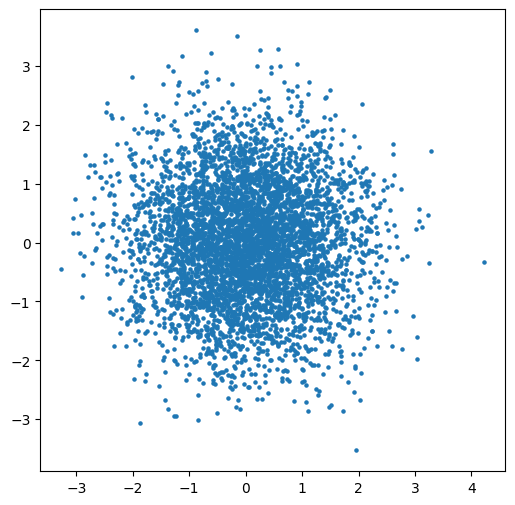

In [ ]:
no = 5000
mean = np.zeros(2)
cov = np.eye(2)
wv = np.random.multivariate_normal(mean, cov, no)
plt.figure(figsize=(6,6))
plt.scatter(wv[:, 0], wv[:, 1],s=5)
plt.show()

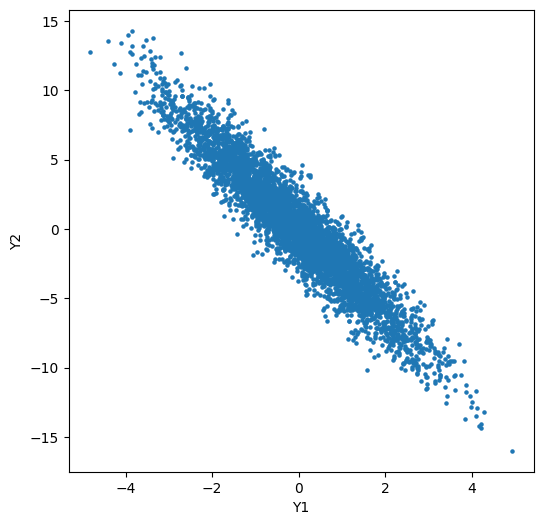

Mean of colored vector: [-0.02999404  0.06916178]
Variances of colored vector: [ 1.96037904 19.66774487]
Correlation coefficient: -0.9464313179990893
Sample covariance matrix:
[[ 1.96077119 -5.87791469]
 [-5.87791469 19.6716792 ]]


In [ ]:
A = np.array([[-1, -1], [2, 4]])
y = np.dot(A, wv.T).T
cm = np.mean(y, axis=0)
c_var = np.var(y, axis=0)
corr_coef = np.corrcoef(y[:, 0], y[:, 1])[0, 1]
plt.figure(figsize=(6,6))
plt.scatter(y[:, 0], y[:, 1], s=5)
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.show()
sample_covariance_matrix = np.cov(y.T)

print(f"Mean of colored vector: {cm}")
print(f"Variances of colored vector: {c_var}")
print(f"Correlation coefficient: {corr_coef}")
print(f"Sample covariance matrix:\n{sample_covariance_matrix}")

In [ ]:
y.shape

(5000, 2)

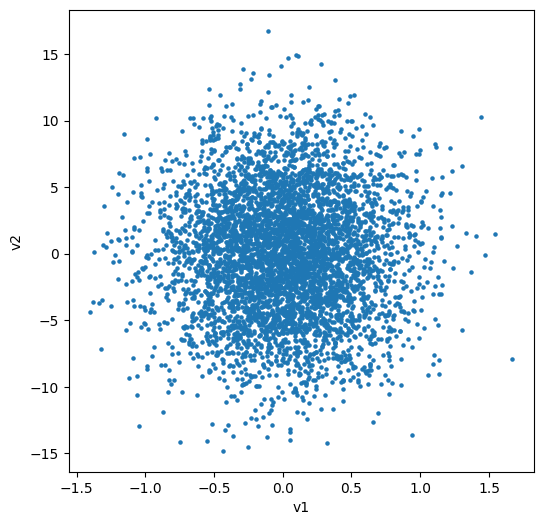

Covariance matrix of whitened vector:
[[ 1.87540108e-01 -2.74075621e-15]
 [-2.74075621e-15  2.14449103e+01]]


In [ ]:
egvl, egvector = np.linalg.eig(np.cov(y.T))
egvl_sqrt = np.diag(1.0 / np.sqrt(egvl))
v= np.dot(egvector.T,y.T).T
plt.figure(figsize=(6,6))
plt.scatter(v[:, 0], v[:, 1], s=5)
plt.xlabel('v1')
plt.ylabel('v2')
plt.show()

cvwh = np.cov(v.T)

print(f"Covariance matrix of whitened vector:\n{cvwh}")


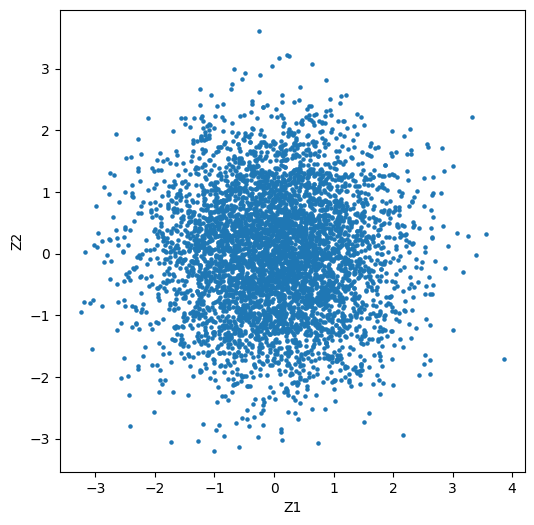

Covariance matrix of transformed vector:
[[ 1.00000000e+00 -1.37020043e-15]
 [-1.37020043e-15  1.00000000e+00]]


In [ ]:
egiv = np.linalg.inv(np.diag(egvl))
z = np.dot(egvl_sqrt, v.T).T
plt.figure(figsize=(6,6))
plt.scatter(z[:, 0], z[:, 1], s=5)
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()

cvtf = np.cov(z.T)

print(f"Covariance matrix of transformed vector:\n{cvtf}")


Question 3

In [ ]:
df1=np.array(pd.read_csv('/content/drive/MyDrive/EE559/Code/wine_data.csv',header=None))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
y_train = df1[:,0]
x_train = df1[:,1:]

In [ ]:
standardized_x_train = StandardScaler().fit_transform(x_train)
standardized_x_train

array([[ 0.2558245 , -0.50162433, -0.8244853 , ...,  0.40709978,
         1.13169801,  0.97105248],
       [ 0.20622873,  0.01802001,  1.10768971, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [ 1.70650069, -0.34931478,  0.48793547, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 0.34261709,  1.73822194, -0.38701171, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 0.21862767,  0.22408586,  0.01400575, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.40892609,  1.57695301,  1.36288264, ..., -1.51861275,
        -1.42836295, -0.58949046]])

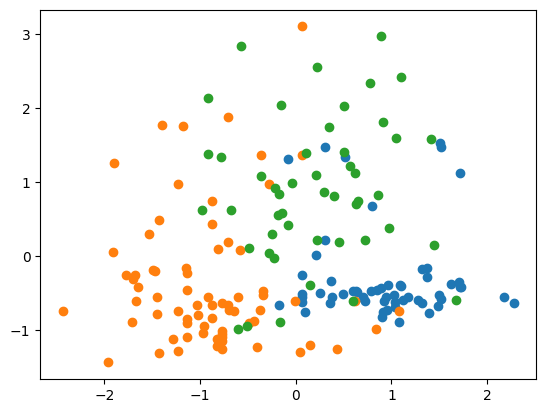

In [ ]:
plt.scatter(standardized_x_train[:58,0],standardized_x_train[:58,1])
plt.scatter(standardized_x_train[58:129,0],standardized_x_train[58:129,1])
plt.scatter(standardized_x_train[129:,0],standardized_x_train[129:,1])

In [ ]:
y_train.shape

(177,)

In [ ]:
weight_vector = []
bias_vector = []
error_list=[]
for i in range(5):
  kf = KFold(20)
  s_train_x,s_train_y = shuffle(standardized_x_train[:,:2],y_train)
  kf.get_n_splits(s_train_x)
  errors = []
  for j,(train_idx,val_idx) in enumerate(kf.split(s_train_x)):
      t_x = s_train_x[train_idx]
      t_y = s_train_y[train_idx]
      val_x = s_train_x[val_idx]
      val_y = s_train_y[val_idx]
      p = Perceptron()
      p.fit(t_x,t_y)
      errors.append(1 - accuracy_score(val_y, p.predict(val_x)))
      if j == 0:
          weight_vector.append(p.coef_)
          bias_vector.append(p.intercept_)
  error_list.append(sum(errors)/20.0)


In [ ]:
error_list

[0.2416666666666667,
 0.2986111111111111,
 0.2715277777777778,
 0.27083333333333337,
 0.313888888888889]

In [ ]:
np.mean(error_list),np.std(error_list)

(0.2844444444444444, 0.035739541334701155)

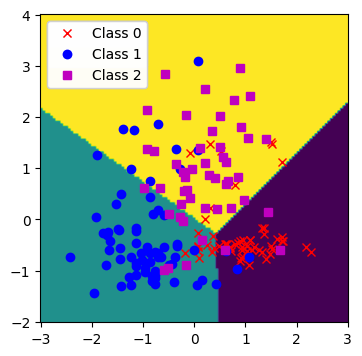

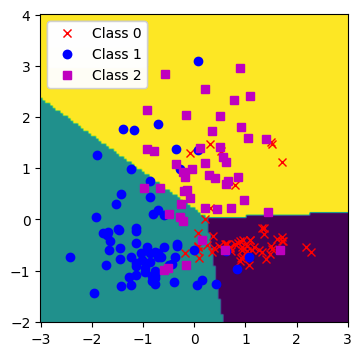

In [ ]:
from plotSVMBoundaries import plotSVMBoundaries
p.coef_ = weight_vector[0]
p.intercept_ = bias_vector[0]
plotSVMBoundaries(standardized_x_train[:,:2],y_train,p)
p.coef_ = weight_vector[4]
p.intercept_ = bias_vector[4]
plotSVMBoundaries(standardized_x_train[:,:2],y_train,p)

In [ ]:
weight_vector = []
bias_vector = []
error_list=[]
new_x = np.zeros((177,2))
new_x[:,0] = standardized_x_train[:,0]
new_x[:,1] = standardized_x_train[:,5]

for i in range(5):
  kf = KFold(20)
  s_train_x,s_train_y = shuffle(new_x,y_train)
  kf.get_n_splits(s_train_x)
  errors = []
  for j,(train_idx,val_idx) in enumerate(kf.split(s_train_x)):
      t_x = s_train_x[train_idx]
      t_y = s_train_y[train_idx]
      val_x = s_train_x[val_idx]
      val_y = s_train_y[val_idx]
      p = Perceptron()
      p.fit(t_x,t_y)
      errors.append(1 - accuracy_score(val_y, p.predict(val_x)))
      if j == 0:
          weight_vector.append(p.coef_)
          bias_vector.append(p.intercept_)
  error_list.append(sum(errors)/20.0)


In [ ]:
error_list

[0.1777777777777778,
 0.23333333333333334,
 0.16319444444444448,
 0.19097222222222227,
 0.22152777777777782]

In [ ]:
np.mean(error_list), np.std(error_list)

(0.19736111111111115, 0.026342796002599412)

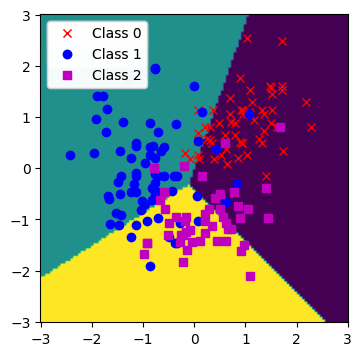

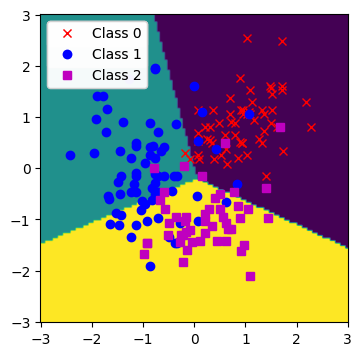

In [ ]:
p.coef_ = weight_vector[0]
p.intercept_ = bias_vector[0]
plotSVMBoundaries(new_x,y_train,p)
p.coef_ = weight_vector[1]
p.intercept_ = bias_vector[1]
plotSVMBoundaries(new_x,y_train,p)

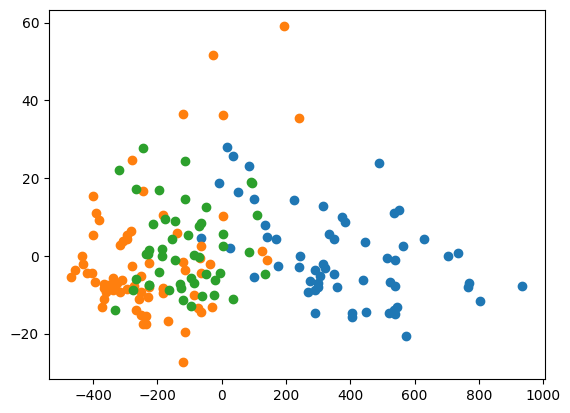

In [ ]:
Principal_component_analysis_x = PCA(n_components=2).fit_transform(x_train)
plt.scatter(Principal_component_analysis_x[:58,0],Principal_component_analysis_x[:58,1])
plt.scatter(Principal_component_analysis_x[58:129,0],Principal_component_analysis_x[58:129,1])
plt.scatter(Principal_component_analysis_x[129:,0],Principal_component_analysis_x[129:,1])

In [ ]:
weight_vector = []
bias_vector = []
error_list=[]

for i in range(5):
  kf = KFold(20)
  s_train_x,s_train_y = shuffle(Principal_component_analysis_x,y_train)
  kf.get_n_splits(s_train_x)
  errors = []
  for j,(train_idx,val_idx) in enumerate(kf.split(s_train_x)):
      t_x = s_train_x[train_idx]
      t_y = s_train_y[train_idx]
      val_x = s_train_x[val_idx]
      val_y = s_train_y[val_idx]
      p = Perceptron()
      p.fit(t_x,t_y)
      errors.append(1 - accuracy_score(val_y, p.predict(val_x)))
      if j == 0:
          weight_vector.append(p.coef_)
          bias_vector.append(p.intercept_)
  error_list.append(sum(errors)/20.0)

In [ ]:
np.mean(error_list), np.std(error_list),error_list

(0.43819444444444444,
 0.0452274771721575,
 [0.37777777777777777,
  0.4875000000000001,
  0.38958333333333334,
  0.4680555555555556,
  0.46805555555555556])

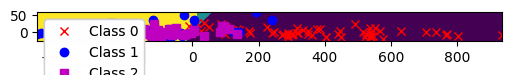

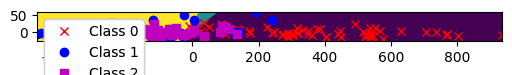

In [ ]:
p.coef_ = weight_vector[0]
p.intercept_ = bias_vector[0]
plotSVMBoundaries(Principal_component_analysis_x,y_train,p)
p.coef_ = weight_vector[1]
p.intercept_ = bias_vector[1]
plotSVMBoundaries(Principal_component_analysis_x,y_train,p)

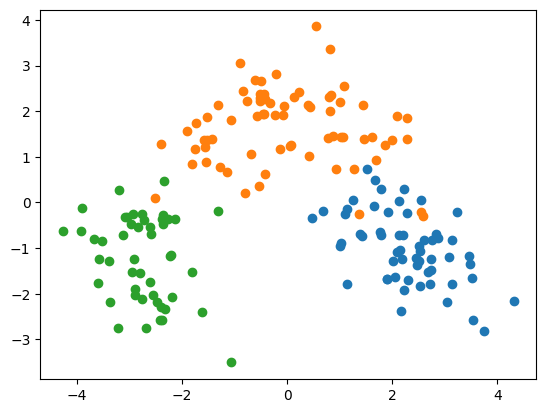

In [ ]:
Principal_component_analysis_x = PCA(n_components=2).fit_transform(standardized_x_train)
plt.scatter(Principal_component_analysis_x[:58,0],Principal_component_analysis_x[:58,1])
plt.scatter(Principal_component_analysis_x[58:129,0],Principal_component_analysis_x[58:129,1])
plt.scatter(Principal_component_analysis_x[129:,0],Principal_component_analysis_x[129:,1])

In [ ]:
weight_vector = []
bias_vector = []
error_list=[]

for i in range(5):
  kf = KFold(20)
  s_train_x,s_train_y = shuffle(Principal_component_analysis_x,y_train)
  kf.get_n_splits(s_train_x)
  errors = []
  for j,(train_idx,val_idx) in enumerate(kf.split(s_train_x)):
      t_x = s_train_x[train_idx]
      t_y = s_train_y[train_idx]
      val_x = s_train_x[val_idx]
      val_y = s_train_y[val_idx]
      p = Perceptron()
      p.fit(t_x,t_y)
      errors.append(1 - accuracy_score(val_y, p.predict(val_x)))
      if j == 0:
          weight_vector.append(p.coef_)
          bias_vector.append(p.intercept_)
  error_list.append(sum(errors)/20.0)

In [ ]:
np.mean(error_list), np.std(error_list),error_list

(0.047083333333333345,
 0.007624987350728221,
 [0.0451388888888889,
  0.06180555555555556,
  0.04444444444444446,
  0.04444444444444445,
  0.039583333333333345])

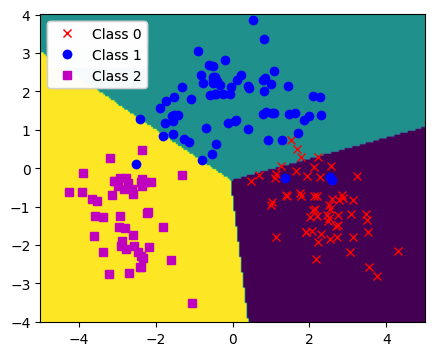

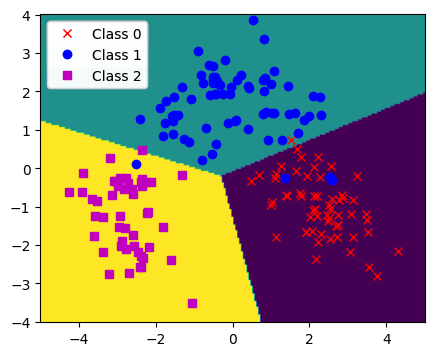

In [ ]:
p.coef_ = weight_vector[4]
p.intercept_ = bias_vector[4]
plotSVMBoundaries(Principal_component_analysis_x,y_train,p)
p.coef_ = weight_vector[2]
p.intercept_ = bias_vector[2]
plotSVMBoundaries(Principal_component_analysis_x,y_train,p)

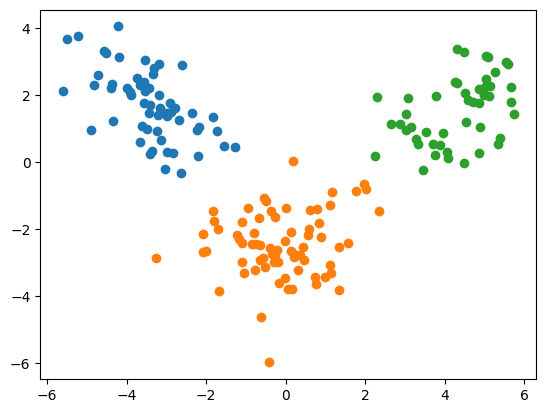

In [ ]:
Standardrise_linear_x = LDA(n_components=2).fit_transform(standardized_x_train,y_train)
plt.scatter(Standardrise_linear_x[:58,0],Standardrise_linear_x[:58,1])
plt.scatter(Standardrise_linear_x[58:129,0],Standardrise_linear_x[58:129,1])
plt.scatter(Standardrise_linear_x[129:,0],Standardrise_linear_x[129:,1])

In [ ]:
weight_vector = []
bias_vector = []
error_list=[]

for i in range(5):
  kf = KFold(20)
  s_train_x,s_train_y = shuffle(Standardrise_linear_x,y_train)
  kf.get_n_splits(s_train_x)
  errors = []
  for j,(train_idx,val_idx) in enumerate(kf.split(s_train_x)):
      t_x = s_train_x[train_idx]
      t_y = s_train_y[train_idx]
      val_x = s_train_x[val_idx]
      val_y = s_train_y[val_idx]
      p = Perceptron()
      p.fit(t_x,t_y)
      errors.append(1 - accuracy_score(val_y, p.predict(val_x)))
      if j == 0:
          weight_vector.append(p.coef_)
          bias_vector.append(p.intercept_)
  error_list.append(sum(errors)/20.0)

In [ ]:
np.mean(error_list), np.std(error_list),error_list

(0.0033333333333333353,
 0.0027216552697590882,
 [0.0, 0.005555555555555558, 0.0, 0.005555555555555558, 0.005555555555555558])

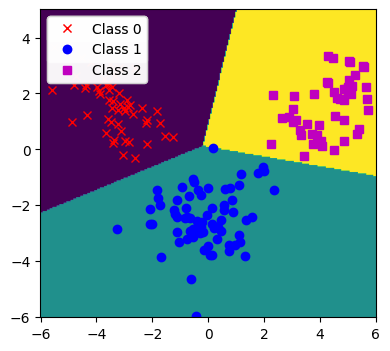

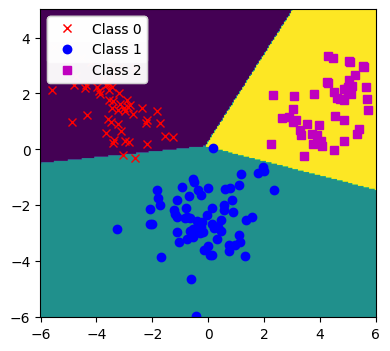

In [ ]:
p.coef_ = weight_vector[0]
p.intercept_ = bias_vector[0]
plotSVMBoundaries(Standardrise_linear_x,y_train,p)
p.coef_ = weight_vector[1]
p.intercept_ = bias_vector[1]
plotSVMBoundaries(Standardrise_linear_x,y_train,p)

Question 4

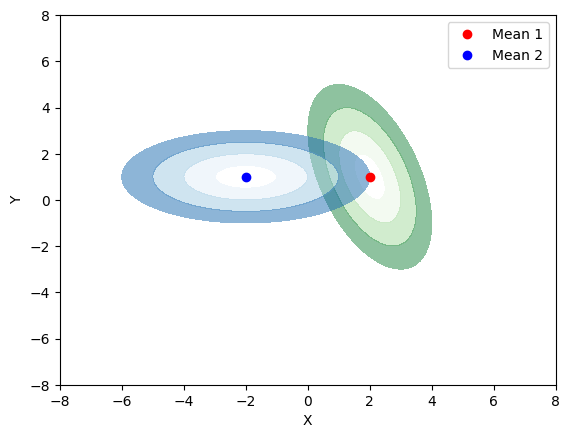

In [ ]:
mean1 = np.array([2, 1])
s1 = np.array([[1, -1], [-1, 4]])
mean2 = np.array([-2, 1])
s2 = np.array([[4, 0], [0, 1]])

Minimum_x,maximum_x = -8, 8
Minimum_x,maximum_x = -8, 8
xx, yy = np.meshgrid(np.linspace(Minimum_x, maximum_x, 100), np.linspace(Minimum_x,maximum_x, 100))
xy = np.column_stack([xx.ravel(), yy.ravel()])

d1 = np.sum((xy - mean1) @ np.linalg.inv(s1) * (xy - mean1), axis=1).reshape(xx.shape)
d2 = np.sum((xy - mean2) @ np.linalg.inv(s2) * (xy - mean2), axis=1).reshape(xx.shape)

plt.plot(mean1[0], mean1[1], 'ro', label='Mean 1')
plt.plot(mean2[0], mean2[1], 'bo', label='Mean 2')

levels = [0.25, 1.0, 2.25, 4.0]
plt.contourf(xx, yy, d1, levels=levels, cmap='Greens', alpha=0.5)
plt.contourf(xx, yy, d2, levels=levels, cmap='Blues', alpha=0.5)

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<ipython-input-12-4f13228583e2>:19: UserWarning: The following kwargs were not used by contour: 'x'
  plt.contourf(xx, yy, k, x=plt.cm.Accent)


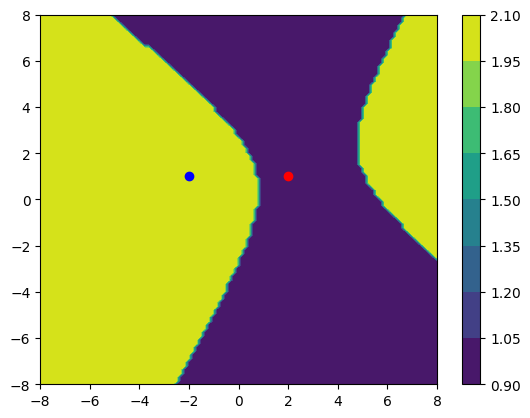

In [ ]:
mean1 = np.array([2, 1])
s1 = np.array([[1, -1], [-1, 4]])
mean2 = np.array([-2, 1])
s2 = np.array([[4, 0], [0, 1]])
Minimum_x,maximum_x = -8, 8
Minimum_x,maximum_x = -8, 8
xx, yy = np.meshgrid(np.linspace(Minimum_x, maximum_x, 100), np.linspace(Minimum_x,maximum_x, 100))
xy = np.column_stack([xx.ravel(), yy.ravel()])
Probability1 = 0.5
Probability2 = 0.5
c1 = np.log(np.linalg.det(s1))
c2 = np.log(np.linalg.det(s2))
d1 = np.sum((xy - mean1) @ np.linalg.inv(s1) * (xy - mean1), axis=1).reshape(xx.shape)
d2 = np.sum((xy - mean2) @ np.linalg.inv(s2) * (xy - mean2), axis=1).reshape(xx.shape)
k= np.where(((0.5 * (d1 + c1)) - np.log(Probability1)) < ((0.5 * (d2 + c2)) - np.log(Probability2)), 1, 2)
plt.contourf(xx, yy, k, x=plt.cm.Accent)
plt.colorbar()
plt.scatter(mean1[0], mean1[1], color='red', marker='o')
plt.scatter(mean2[0], mean2[1], color='blue', marker='o')
plt.show()

<ipython-input-13-b4b4c0795e30>:19: UserWarning: The following kwargs were not used by contour: 'x'
  plt.contourf(xx, yy, k, x=plt.cm.Accent)


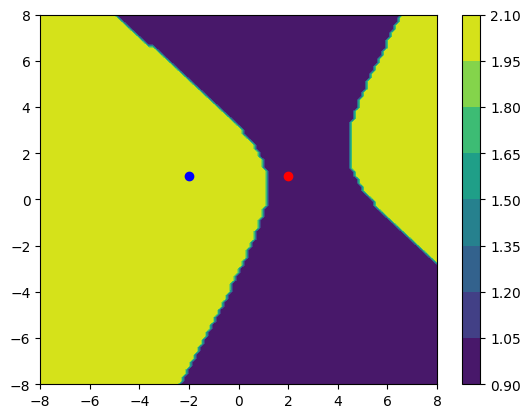

In [ ]:
mean1 = np.array([2, 1])
s1 = np.array([[1, -1], [-1, 4]])
mean2 = np.array([-2, 1])
s2 = np.array([[4, 0], [0, 1]])
Minimum_x,maximum_x = -8, 8
Minimum_x,maximum_x = -8, 8
xx, yy = np.meshgrid(np.linspace(Minimum_x, maximum_x, 100), np.linspace(Minimum_x,maximum_x, 100))
xy = np.column_stack([xx.ravel(), yy.ravel()])
Probability1 = 0.3
Probability2 = 0.7
c1 = np.log(np.linalg.det(s1))
c2 = np.log(np.linalg.det(s2))
d1 = np.sum((xy - mean1) @ np.linalg.inv(s1) * (xy - mean1), axis=1).reshape(xx.shape)
d2 = np.sum((xy - mean2) @ np.linalg.inv(s2) * (xy - mean2), axis=1).reshape(xx.shape)
k= np.where(((0.5 * (d1 + c1)) - np.log(Probability1)) < ((0.5 * (d2 + c2)) - np.log(Probability2)), 1, 2)
plt.contourf(xx, yy, k, x=plt.cm.Accent)
plt.colorbar()
plt.scatter(mean1[0], mean1[1], color='red', marker='o')
plt.scatter(mean2[0], mean2[1], color='blue', marker='o')
plt.show()

<ipython-input-14-2a09d5332134>:19: UserWarning: The following kwargs were not used by contour: 'x'
  plt.contourf(xx, yy, k, x=plt.cm.Accent)


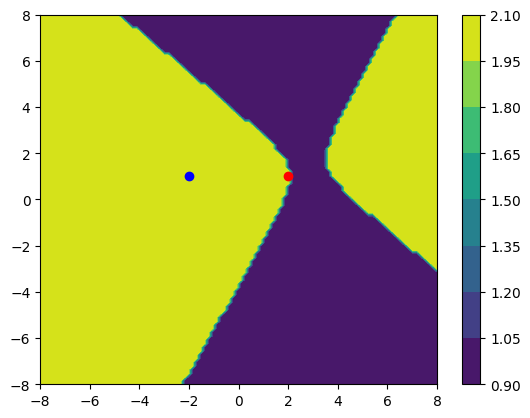

In [ ]:
mean1 = np.array([2, 1])
s1 = np.array([[1, -1], [-1, 4]])
mean2 = np.array([-2, 1])
s2 = np.array([[4, 0], [0, 1]])
Minimum_x,maximum_x = -8, 8
Minimum_x,maximum_x = -8, 8
xx, yy = np.meshgrid(np.linspace(Minimum_x, maximum_x, 100), np.linspace(Minimum_x,maximum_x, 100))
xy = np.column_stack([xx.ravel(), yy.ravel()])
Probability1 = 0.1
Probability2 = 0.9
c1 = np.log(np.linalg.det(s1))
c2 = np.log(np.linalg.det(s2))
d1 = np.sum((xy - mean1) @ np.linalg.inv(s1) * (xy - mean1), axis=1).reshape(xx.shape)
d2 = np.sum((xy - mean2) @ np.linalg.inv(s2) * (xy - mean2), axis=1).reshape(xx.shape)
k= np.where(((0.5 * (d1 + c1)) - np.log(Probability1)) < ((0.5 * (d2 + c2)) - np.log(Probability2)), 1, 2)
plt.contourf(xx, yy, k, x=plt.cm.Accent)
plt.colorbar()
plt.scatter(mean1[0], mean1[1], color='red', marker='o')
plt.scatter(mean2[0], mean2[1], color='blue', marker='o')
plt.show()